<a href="https://colab.research.google.com/github/MayankGuptaaa/Sentiment-Polarity-Classification-Assignment/blob/main/Assignment_NLP_2101117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install pandas
!pip install pandas

# Install scikit-learn (for TfidfVectorizer and metrics)
!pip install scikit-learn

# Install matplotlib (for plotting)
!pip install matplotlib

# Install seaborn (for enhanced plotting functionality)
!pip install seaborn

# Install tensorflow (for neural networks)
!pip install tensorflow



Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.5064 - loss: 1.0194 - val_accuracy: 0.5000 - val_loss: 0.7267
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5029 - loss: 0.9265 - val_accuracy: 0.5000 - val_loss: 0.7131
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.5029 - loss: 0.8406 - val_accuracy: 0.5940 - val_loss: 0.6333
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.7139 - loss: 0.6543 - val_accuracy: 0.7680 - val_loss: 0.5121
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8556 - loss: 0.4611 - val_accuracy: 0.7750 - val_loss: 0.5135
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9054 - loss: 0.3335 - val_accuracy: 0.7840 - val_loss: 0.5359
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Final Performance Metrics:
True Positives (TP): 703
True Negatives (TN): 551
False Positives (FP): 280
False Negatives (FN): 128
Precision: 71.516%
Recall: 84.597%
F1-score: 77.508%


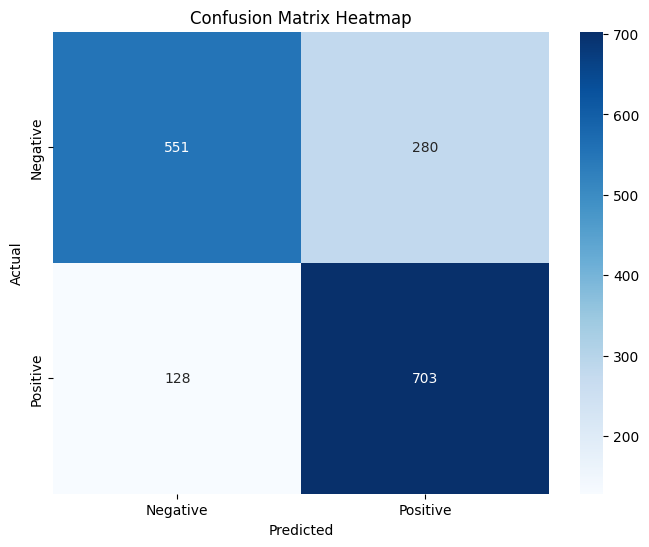

<Figure size 640x480 with 0 Axes>

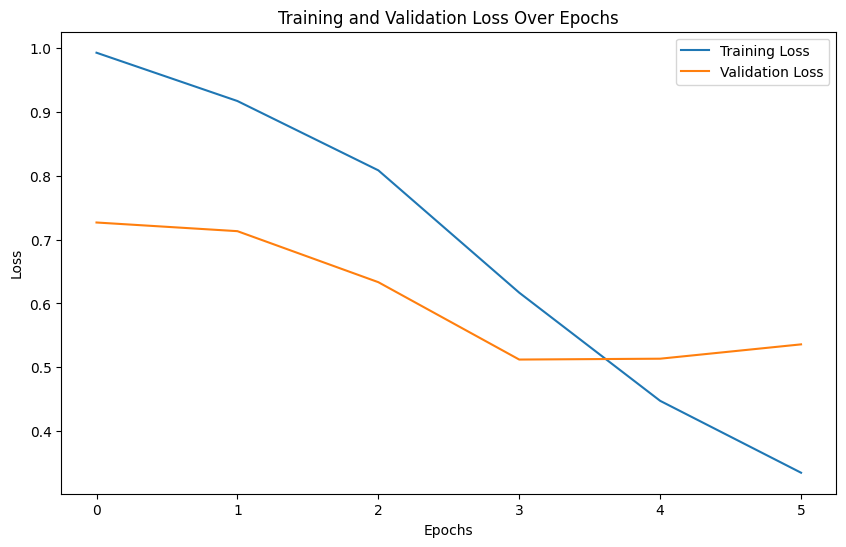

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Loading Files
pos_file = r'/content/rt-polarity.pos'
neg_file = r'/content/rt-polarity.neg'

# Reading reviews from files
with open(neg_file, 'r', encoding='latin-1') as neg_f:
    neg_reviews = neg_f.readlines()

with open(pos_file, 'r', encoding='latin-1') as pos_f:
    pos_reviews = pos_f.readlines()

# Creating dataframes for positive and negative reviews
neg_df = pd.DataFrame(neg_reviews, columns=["Review"])
neg_df['class'] = 0
pos_df = pd.DataFrame(pos_reviews, columns=["Review"])
pos_df['class'] = 1

# Splitting the data into training, validation, and test sets respectively
train_data = pd.concat([neg_df.iloc[:4000], pos_df.iloc[:4000]])
val_data = pd.concat([neg_df.iloc[4000:4500], pos_df.iloc[4000:4500]])
test_data = pd.concat([neg_df.iloc[4500:], pos_df.iloc[4500:]])

X_train, y_train = train_data['Review'], train_data['class']
X_val, y_val = val_data['Review'], val_data['class']
X_test, y_test = test_data['Review'], test_data['class']

# Applying TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(X_train)
X_val = tfidf.transform(X_val)
X_test = tfidf.transform(X_test)

# Convert sparse matrix to dense matrix for use with Keras
X_train = X_train.toarray()
X_val = X_val.toarray()
X_test = X_test.toarray()

# Convert target labels to numpy arrays
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

# Building an optimized neural network model
optimizer = Adam(learning_rate=0.0001)
model = Sequential()
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Class weighting to handle class imbalance
class_weight = {0: 1, 1: 2}

# Training the model with early stopping and class weights
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), class_weight=class_weight, callbacks=[early_stopping])

# Evaluating the model on the test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Calculating confusion matrix and metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
precision = precision * 100
recall = recall * 100
f1 = f1 * 100

# Printing final performance metrics
print("\nFinal Performance Metrics:")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"Precision: {precision:.3f}%")
print(f"Recall: {recall:.3f}%")
print(f"F1-score: {f1:.3f}%")

# Plotting the confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()
plt.savefig('confusion_matrix_heatmap.png', bbox_inches='tight', dpi=300)

# Plotting the training and validation loss graph
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
